In [1]:
!pip install rdflib

In [2]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import FOAF, RDF

# Namespace (for custom attributes)
animal_ns = Namespace('http://data.drpawspaw.com/animals/')
disease_ns = Namespace('http://data.drpawspaw.com/diseases/')
symptom_ns = Namespace('http://data.drpawspaw.com/symptoms/')
attribute = Namespace('http://drpawspaw.com/attributes#')

# Main Nodes
cat = animal_ns['cat']
dog = animal_ns['dog']

g = Graph()

g.bind('animal', animal_ns)
g.bind('disease', disease_ns)
g.bind('symptom', symptom_ns)
g.bind('attribute', attribute)

In [3]:
import csv

file = open('cat_diseases.csv')
data = csv.reader(file)

cat_diseases = {}
for row in data:
    if (row[1] != "Symtoms"):
        symptoms = row[1].split(',')
        refactor_symptoms = set()
        for sy in symptoms:
            # Make sure to remove space and add underscore for each space
            refactor_symptoms.add(sy.strip().replace(" ", "_"))
        cat_diseases[row[0].replace(" ", "_")] = refactor_symptoms

In [4]:
print(cat_diseases)

{'Abdominal_Cavity_Inflammation': {'Fever', 'Abdominal_Pain', 'Vommiting', 'Abnormal_Heart_Rhythm', 'Increase_Heart_Rate', 'Low_Blood_Pressure'}, 'Bacterial_Infection_(Actinomycosis)': {'Pain_and_Fever', 'Inflammation_of_the_bone_or_vertebrae', 'trouble_walking', 'Infection_on_face_and_neck_area', 'Inflammation_of_the_cellular_tissue_behind_the_peritoneum', 'Skin_swellings_or_abscesses'}, 'Colonic_Ulcer': {'Tenesmus', 'mucoid_diarrhea_with_increasing_frequency_of_defecation', 'Bloody', 'Weight_loss'}, 'Heartworm_Disease': {'Difficulty_breathing', 'Exercise_intolerance', 'Decreased_appetite', 'Heart_murmur', 'Coughing', 'Increased_breathing', 'Lethargy', 'Vomiting', 'Weight_loss', 'Open_mouth_breathing'}}


In [5]:
for x in cat_diseases['Abdominal_Cavity_Inflammation']:
    print(x)

Fever
Abdominal_Pain
Vommiting
Abnormal_Heart_Rhythm
Increase_Heart_Rate
Low_Blood_Pressure


In [6]:
for disease in cat_diseases:   
    g.add((cat, attribute['disease'], disease_ns[disease]))
    
    for symptom in cat_diseases[disease]:
        g.add((disease_ns[disease], attribute['symptom'], symptom_ns[symptom]))

In [7]:
print(g.serialize(format='turtle').encode().decode('utf-8'))

@prefix animal: <http://data.drpawspaw.com/animals/> .
@prefix attribute: <http://drpawspaw.com/attributes#> .
@prefix disease: <http://data.drpawspaw.com/diseases/> .
@prefix symptom: <http://data.drpawspaw.com/symptoms/> .

animal:cat attribute:disease disease:Abdominal_Cavity_Inflammation,
        disease:Bacterial_Infection_\(Actinomycosis\),
        disease:Colonic_Ulcer,
        disease:Heartworm_Disease .

disease:Abdominal_Cavity_Inflammation attribute:symptom symptom:Abdominal_Pain,
        symptom:Abnormal_Heart_Rhythm,
        symptom:Fever,
        symptom:Increase_Heart_Rate,
        symptom:Low_Blood_Pressure,
        symptom:Vommiting .

disease:Bacterial_Infection_\(Actinomycosis\) attribute:symptom symptom:Infection_on_face_and_neck_area,
        symptom:Inflammation_of_the_bone_or_vertebrae,
        symptom:Inflammation_of_the_cellular_tissue_behind_the_peritoneum,
        symptom:Pain_and_Fever,
        symptom:Skin_swellings_or_abscesses,
        symptom:trouble_wal

In [24]:
q = """
    PREFIX attribute: <http://drpawspaw.com/attributes#>
    PREFIX symptom: <http://data.drpawspaw.com/symptoms/>
    
    SELECT ?d
    WHERE {
        ?d attribute:symptom symptom:Increased_breathing .
    }
    """

for res in g.query(q):
    print(res)

(rdflib.term.URIRef('http://data.drpawspaw.com/diseases/Heartworm_Disease'),)


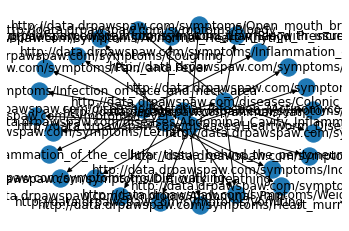

In [19]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

G = rdflib_to_networkx_multidigraph(g)

pos = nx.spring_layout(G, scale=5)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

plt.show()

In [9]:
g.serialize(destination='cat-disease-v1.xml', format='xml')

<Graph identifier=N2332f6ca0b1a4780a80f473a98c4e882 (<class 'rdflib.graph.Graph'>)>